In [1]:
#to make the plot in the notebook and not in an extra window
%matplotlib notebook 

import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd



In [2]:
#to make the plot in the notebook and not in an extra window
%matplotlib notebook 

import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd


with open('/Users/randeln/Documents/Zlatic_lab/close-loop/Notes/Handle-like_Traces/17-08-26L6-handle-cl.csv', 'r') as csvfile:

    names = ['pt%s' % r for r in range(10)]
    #df = pd.read_csv(csvfile, delim_whitespace=True, names=names)
    df = pd.read_csv(csvfile, delimiter = ',')
    #df = pd.read_csv(csvfile, delimiter = ',', header=None)

    print(df.head())
    #print(df.tail())
    

         A7      A7.1        A6      A6.1        A5      A5.1        A4  \
0  0.066503  0.046015  0.042726  0.063056  0.049406  0.012936  0.042558   
1  0.062771  0.044038  0.081850  0.074123  0.053100  0.013772  0.043811   
2  0.087817  0.058123  0.113783  0.060057  0.052903  0.029020 -0.001491   
3  0.039237  0.046482  0.097710  0.065116  0.049105  0.016466  0.003848   
4  0.050723  0.056800  0.070373  0.054836  0.054665  0.025565  0.038019   

         A2      A2.1        T3      T3.1        T2        A8      A8.1  \
0 -0.042797  0.038478  0.061378  0.055977  0.090299  0.108870  0.030805   
1 -0.040912  0.046000  0.023524  0.050629  0.092804  0.097227  0.009736   
2 -0.036500  0.051576  0.032635  0.036059  0.092674  0.101034  0.004672   
3 -0.029305  0.038936  0.066123  0.051076  0.087837  0.062354 -0.009725   
4 -0.005604  0.052734  0.067209  0.043206  0.044354  0.063603  0.003148   

       A4.1      A2.2        A3      A3.1  
0  0.068768  0.032615 -0.023530  0.075472  
1  0.08868

In [3]:
#import csv behavior
with open('/Users/randeln/Documents/Zlatic_lab/close-loop/Notes/behavior_csv/17-08-26L6-behavior-cl.csv', 'r') as csvfile:
    df_behavior = pd.read_csv(csvfile, delimiter = ';')

#replace NaN with zero
df_behavior.fillna(0, inplace=True)

print(df_behavior.head())
#print(df_behavior.tail())

   START  END   fw   bw  hunch  stim  turn  other   HP  left turn  right turn
0    153  159  0.0  0.0    0.0   1.0   0.0    0.0  0.0        0.0         0.0
1    160  173  1.0  0.0    0.0   0.0   0.0    0.0  0.0        0.0         0.0
2    191  199  0.0  0.0    0.0   0.0   1.0    0.0  0.0        1.0         0.0
3    207  216  0.0  0.0    0.0   0.0   1.0    0.0  0.0        0.0         1.0
4    217  224  0.0  0.0    0.0   0.0   1.0    0.0  0.0        1.0         0.0


In [4]:
#iterate through rows per collumn to find when action happend (first collumn here)

#print(df_behavior.iloc[1,6])
#print(len(df_behavior))
#print(range(len(df_behavior))) 
#print(range(len(df_behavior.iloc[:,0]))) 

for i in range(len(df_behavior.iloc[:,0])):
 
    if (df_behavior.iloc[i,4] == 1):       
        print('TP of stim =', df_behavior.iloc[i,0])


TP of stim = 340
TP of stim = 2332
TP of stim = 2372
TP of stim = 2480
TP of stim = 3196
TP of stim = 3260


In [5]:
#Overall:single cell, average for different cells and samples, min/max combined with avg, std-dev between different transitions

# combine all handles which are from the same segment
#df[['b', 'c']].iloc[[2,4]].mean(axis=1) # df of column b, c and row 2,4

#T1 = df[['T1', 'T1.1', 'T1.2', 'T1.3']].mean(axis=1)
#T2 = df[['T2', 'T2.1', 'T2.2', 'T2.3']].mean(axis=1)
#T3 = df[['T3', 'T3.1', 'T3.2', 'T3.3']].mean(axis=1)
#A1 = df[['A1', 'A1.1', 'A1.2', 'A1.3']].mean(axis=1)
#A2 = df[['A2', 'A2.1', 'A2.2', 'A2.3']].mean(axis=1)
#A3 = df[['A3', 'A3.1', 'A3.2', 'A3.3']].mean(axis=1)
#A4 = df[['A4', 'A4.1', 'A4.2', 'A4.3']].mean(axis=1)
#A5 = df[['A5', 'A5.1', 'A5.2', 'A5.3']].mean(axis=1)
#A6 = df[['A6', 'A6.1', 'A6.2', 'A6.3']].mean(axis=1)
#A7 = df[['A7', 'A7.1', 'A7.2', 'A7.3']].mean(axis=1)
#A8 = df[['A8', 'A8.1', 'A8.2', 'A8.3']].mean(axis=1)


#T3 = df[['T3', 'T3.1']].mean(axis=1)
#A1 = df[['A1', 'A1.1', 'A1.2']].mean(axis=1)
#A2 = df[['A2', 'A2.1']].mean(axis=1)
#A3 = df[['A3', 'A3.1']].mean(axis=1)
#A4 = df[['A4', 'A4.1']].mean(axis=1)
#A5 = df[['A5', 'A5.1']].mean(axis=1)
#A6 = df[['A6', 'A6.1']].mean(axis=1)
#A7 = df[['A7', 'A7.1', 'A7.2']].mean(axis=1)
#A8 = df[['A8', 'A8.1']].mean(axis=1)


#combine all handles
#h_avg = df.mean(axis=1)


In [6]:
#min/max combined with avg

h_avg = df.mean(axis=1)
h_min = df.min(axis=1)
h_max = df.max(axis=1)


<IPython.core.display.Javascript object>


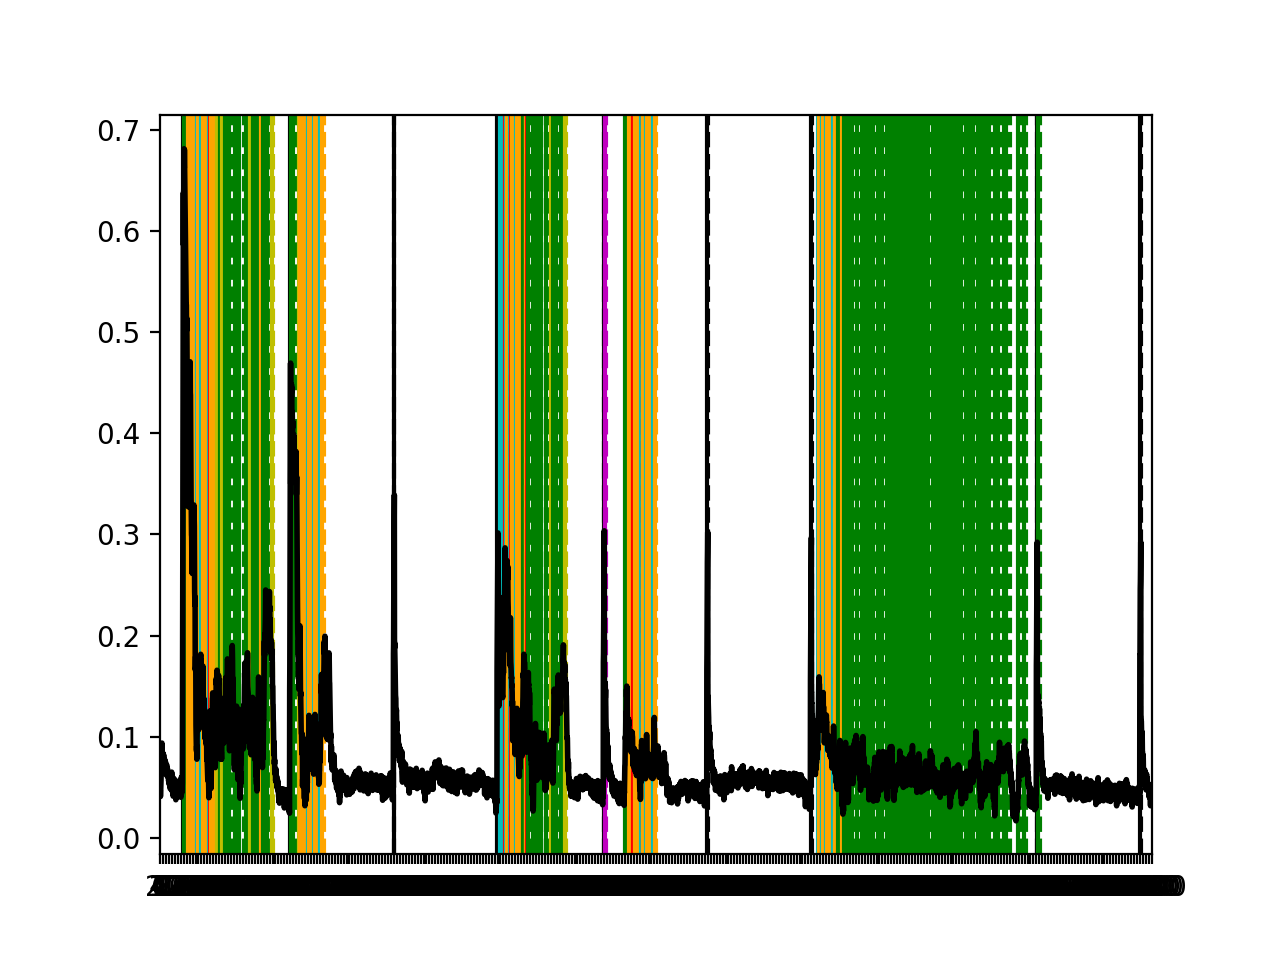

In [7]:
fig = plt.figure()
ax  = fig.add_subplot(111)

for i in range(len(df_behavior.iloc[:,0])):
 
  
    if (df_behavior.loc[i,'stim'] == 1):      
        #print('TP of stim =', df_behavior.iloc[i,0])
        #ax.annotate('stim_start', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='k', linestyle='-')
        # Plot end frame
        plt.axvline(df_behavior.iloc[i, 1], color='k', linestyle='--')
         
    if (df_behavior.loc[i,'fw'] == 1):      
        #print('TP of fw =', df_behavior.iloc[i,0])
        #ax.annotate('fw', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='g', linestyle='-')
        plt.axvline(df_behavior.iloc[i, 1], color='g', linestyle='--')
        
    if (df_behavior.loc[i,'bw'] == 1):      
        #print('TP of bw =', df_behavior.iloc[i,0])
        #ax.annotate('bw', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='c', linestyle='-')
        plt.axvline(df_behavior.iloc[i, 1], color='c', linestyle='--')
            
    if (df_behavior.loc[i,'turn'] == 1):      
        #print('TP of turn =', df_behavior.iloc[i,0])
        #ax.annotate('turn', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='orange', linestyle='-')
        plt.axvline(df_behavior.iloc[i, 1], color='orange', linestyle='--')
        
    if (df_behavior.loc[i,'hunch'] == 1):      
        #print('TP of hunch =', df_behavior.iloc[i,0])
        #ax.annotate('hunch', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='r', linestyle='-')
        plt.axvline(df_behavior.iloc[i, 1], color='r', linestyle='--')
        
    if (df_behavior.loc[i,'HP'] == 1):      
        #print('TP of HP =', df_behavior.iloc[i,0])
        #ax.annotate('HP', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='y', linestyle='-')
        plt.axvline(df_behavior.iloc[i, 1], color='y', linestyle='--')
        
    if (df_behavior.loc[i,'other'] == 1):      
        #print('TP of other =', df_behavior.iloc[i,0])
        #ax.annotate('other', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='m', linestyle='-')
        plt.axvline(df_behavior.iloc[i, 1], color='m', linestyle='--')
        
        
    '''    
    if (df_behavior.loc[i,'left turn'] == 1):      
        #print('TP of left turn =', df_behavior.iloc[i,0])
        #ax.annotate('left turn', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='orange', linestyle='--')
        
    if (df_behavior.loc[i,'right turn'] == 1):      
        #print('TP of right turn =', df_behavior.iloc[i,0])
        #ax.annotate('right turn', xy=(df_behavior.iloc[i,0], 1))
        plt.axvline(df_behavior.iloc[i,0], color='violet', linestyle='--') 
    '''            


#ax.annotate('Stim', xy=(115, 1))
'''
#plot single cells
df.plot(y='A8', ax =ax, color = 'c', label = 'A8', linewidth=2)
df.plot(y='A8.1', ax =ax, color = 'c', linestyle = 'dashed', label = 'A8', linewidth=2)
df.plot(y='A7', ax =ax, color = 'g', label = 'A7', linewidth=2)
df.plot(y='A7.1', ax =ax, color = 'g',linestyle = 'dashed', label = 'A7', linewidth=2)
df.plot(y='A7.2', ax =ax, color = 'g', linestyle = 'dotted', label = 'A7', linewidth=2)
df.plot(y='A6', ax =ax, color = 'orange', linestyle = 'dashed', label = 'A6', linewidth=2)
df.plot(y='A6.1', ax =ax, color = 'orange', label = 'A6', linewidth=2)
df.plot(y='A5', ax =ax, color = 'violet', label = 'A5', linewidth=2)
df.plot(y='A5.1', ax =ax, color = 'violet', linestyle = 'dashed', label = 'A5', linewidth=2)
df.plot(y='A4', ax =ax, color = 'm', label = 'A4', linewidth=2)
df.plot(y='A4.1', ax =ax, color = 'm', linestyle = 'dashed', label = 'A4', linewidth=2)
df.plot(y='A3', ax =ax, color = 'y', label = 'A3', linewidth=2)
df.plot(y='A1', ax =ax, color = 'k', label = 'A1', linewidth=2)
df.plot(y='A1.1', ax =ax, color = 'k', linestyle = 'dashed', label = 'A1', linewidth=2)
df.plot(y='T3', ax =ax, color = 'r', label = 'T3', linewidth=2)
df.plot(y='T3.1', ax =ax, color = 'r', label = 'T3', linewidth=2)
df.plot(y='A2', ax =ax, color = 'brown', label = 'A2', linewidth=2)
df.plot(y='A2.1', ax =ax, color = 'brown', linestyle = 'dashed', label = 'A2', linewidth=2)
df.plot(y='A3.1', ax =ax, color = 'y', linestyle = 'dashed', label = 'A3', linewidth=2)
df.plot(y='A1.2', ax =ax, color = 'k', linestyle = 'dotted', label = 'A1', linewidth=2)
'''

#plot mean for cells per segment
'''
A8.plot(ax =ax, color = 'c', label = 'A8', linewidth=2)
A7.plot(ax =ax, color = 'm', label = 'A7', linewidth=2)
A6.plot(ax =ax, color = 'k', label = 'A6', linewidth=2)
A5.plot(ax =ax, color = 'r', label = 'A5', linewidth=2)
A4.plot(ax =ax, color = 'y', label = 'A4', linewidth=2)
A3.plot(ax =ax, color = 'g', label = 'A3', linewidth=2)
A2.plot(ax =ax, color = 'orange', label = 'A2', linewidth=2)
A1.plot(ax =ax, color = 'violet', label = 'A1', linewidth=2)
T3.plot(ax =ax, color = 'brown', label = 'T3', linewidth=2)
'''

#plot mean all handles

h_avg.plot(ax =ax, color = 'k', label = 'handle', linewidth=2)
#h_min.plot(ax =ax, color = 'r', linewidth=1, alpha = 0.5)
#h_max.plot(ax =ax, color = 'r', linewidth=1, alpha = 0.5)
#ax.fill_between(x, h_min, h_max, color = 'r', alpha=0.4) #have to define x?!?

#set fine x-axis scale
tick_spacing = 20
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
#set x and y limits 
#plt.axis((0, 4001, -0.05, 0.2))